# Temperature and Humidity Analysis between Room and Cabinet



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Data



Mount drive, read CSV and Remark Feature

In [29]:
df = pd.read_csv("/content/drive/MyDrive/Capstone Project/Dataset.csv")
df=df.dropna()
df

,Date,RM_Temp,RM_Humidity,WD_Temp,WD_Humidity
0,20/6/2023 2:22,28.81℃,62.44%,29.56℃,70.81%
1,20/6/2023 2:32,28.81℃,63.56%,29.50℃,71.06%
2,20/6/2023 2:42,28.81℃,63.88%,29.25℃,71.88%
3,20/6/2023 2:52,28.81℃,64.12%,29.13℃,72.38%
4,20/6/2023 3:02,28.81℃,65.25%,29.13℃,72.62%
...,...,...,...,...,...
1004,27/6/2023 1:42,28.50℃,73.19%,29.50℃,75.81%
1005,27/6/2023 1:52,28.44℃,73.12%,29.56℃,75.62%
1006,27/6/2023 2:02,28.44℃,73.12%,29.56℃,75.44%
1007,27/6/2023 2:12,28.44℃,73.25%,29.56℃,75.25%


# Remove Special Characters

In [33]:
df['RM_Humidity'] = df['RM_Humidity'].str.replace('%', '')
df['WD_Humidity'] = df['WD_Humidity'].str.replace('%', '')
df['RM_Temp'] = df['RM_Temp'].str.replace('℃', '')
df['WD_Temp'] = df['WD_Temp'].str.replace('℃', '')
#df['Date'] = df['Date'].str[11:16:]
df.head()

,Date,RM_Temp,RM_Humidity,WD_Temp,WD_Humidity
0,20/6/2023 2:22,28.81,62.44,29.56,70.81
1,20/6/2023 2:32,28.81,63.56,29.50,71.06
2,20/6/2023 2:42,28.81,63.88,29.25,71.88
3,20/6/2023 2:52,28.81,64.12,29.13,72.38
4,20/6/2023 3:02,28.81,65.25,29.13,72.62


In [34]:
df = df.rename(columns={"RM_Temp": "Room_Temp"})
df = df.rename(columns={"RM_Humidity": "Room_Humidity"})
df = df.rename(columns={"WD_Temp": "Waredrobe_Temperature"})
df = df.rename(columns={"WD_Humidity": "Waredrobe_Humidity"})
df

,Date,Room_Temp,Room_Humidity,Waredrobe_Temperature,Waredrobe_Humidity
0,20/6/2023 2:22,28.81,62.44,29.56,70.81
1,20/6/2023 2:32,28.81,63.56,29.50,71.06
2,20/6/2023 2:42,28.81,63.88,29.25,71.88
3,20/6/2023 2:52,28.81,64.12,29.13,72.38
4,20/6/2023 3:02,28.81,65.25,29.13,72.62
...,...,...,...,...,...
1004,27/6/2023 1:42,28.50,73.19,29.50,75.81
1005,27/6/2023 1:52,28.44,73.12,29.56,75.62
1006,27/6/2023 2:02,28.44,73.12,29.56,75.44
1007,27/6/2023 2:12,28.44,73.25,29.56,75.25


In [35]:
df.dtypes

Date                     object
Room_Temp                object
Room_Humidity            object
Waredrobe_Temperature    object
Waredrobe_Humidity       object
dtype: object

In [37]:
df['Room_Temp'] = df['Room_Temp'].astype(str).astype(float)
df['Room_Humidity'] = df['Room_Humidity'].astype(str).astype(float)
df['Waredrobe_Temperature'] = df['Waredrobe_Temperature'].astype(str).astype(float)
df['Waredrobe_Humidity'] = df['Waredrobe_Humidity'].astype(str).astype(float)

In [38]:
df.dtypes

Date                      object
Room_Temp                float64
Room_Humidity            float64
Waredrobe_Temperature    float64
Waredrobe_Humidity       float64
dtype: object

In [39]:
df

,Date,Room_Temp,Room_Humidity,Waredrobe_Temperature,Waredrobe_Humidity
0,20/6/2023 2:22,28.81,62.44,29.56,70.81
1,20/6/2023 2:32,28.81,63.56,29.50,71.06
2,20/6/2023 2:42,28.81,63.88,29.25,71.88
3,20/6/2023 2:52,28.81,64.12,29.13,72.38
4,20/6/2023 3:02,28.81,65.25,29.13,72.62
...,...,...,...,...,...
1004,27/6/2023 1:42,28.50,73.19,29.50,75.81
1005,27/6/2023 1:52,28.44,73.12,29.56,75.62
1006,27/6/2023 2:02,28.44,73.12,29.56,75.44
1007,27/6/2023 2:12,28.44,73.25,29.56,75.25


<ipython-input-48-f0dd2a53c001>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


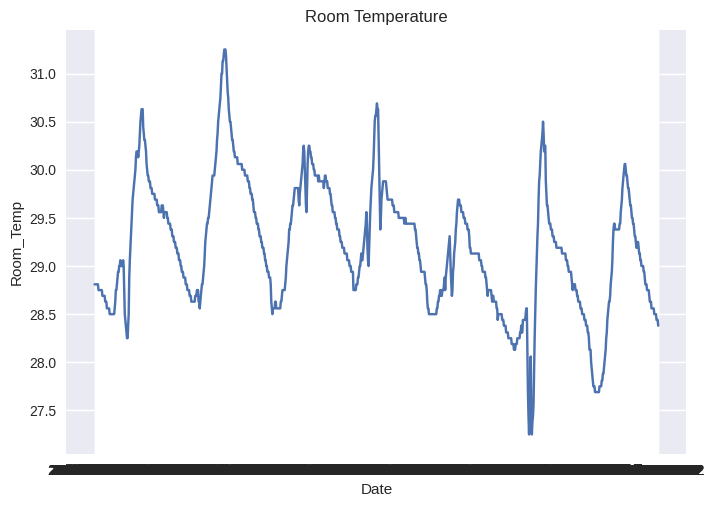

In [48]:
plt.style.use('seaborn')
plt.plot(df['Date'], df['Room_Temp'])
plt.xlabel('Date')
plt.ylabel('Room_Temp')
plt.title('Room Temperature')

plt.show()

<ipython-input-49-a8967b204de5>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


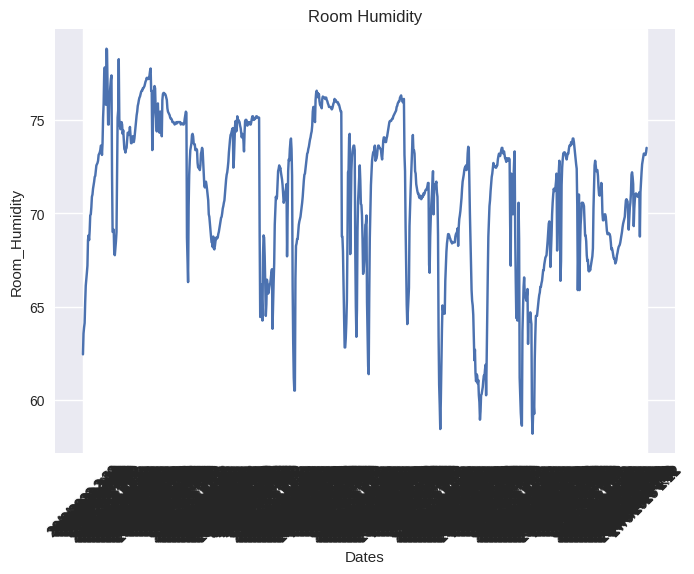

In [49]:
plt.style.use('seaborn')
plt.plot(df['Date'], df['Room_Humidity'])
plt.xlabel('Dates')
plt.ylabel('Room_Humidity')
plt.title('Room Humidity')
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='Date', ylabel='Room_Temp'>

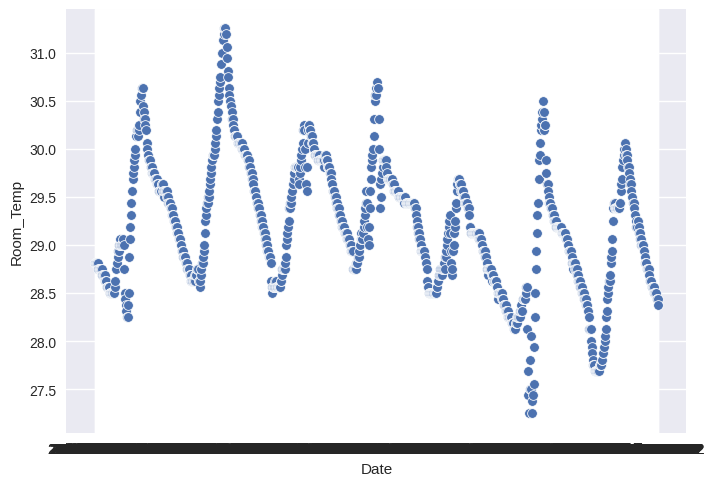

In [42]:
sns.scatterplot(
 data=df,
 x="Date",
 y="Room_Temp",
)

<Axes: xlabel='Date', ylabel='Room_Humidity'>

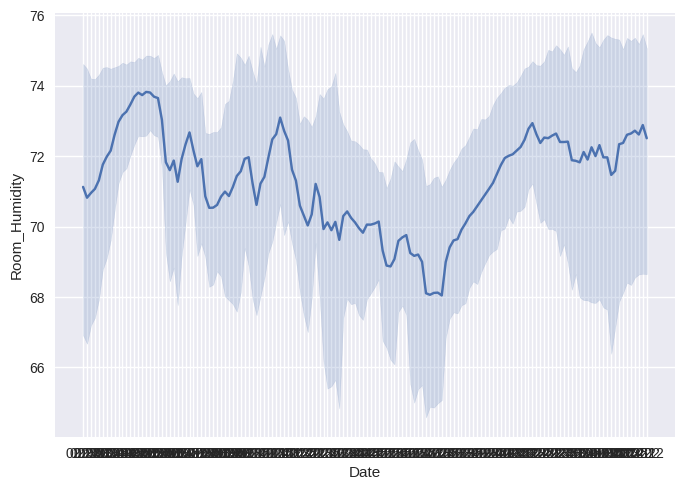

In [ ]:
sns.lineplot(data=df, x="Date", y="Room_Humidity")

<ipython-input-50-943d15b4e2c0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


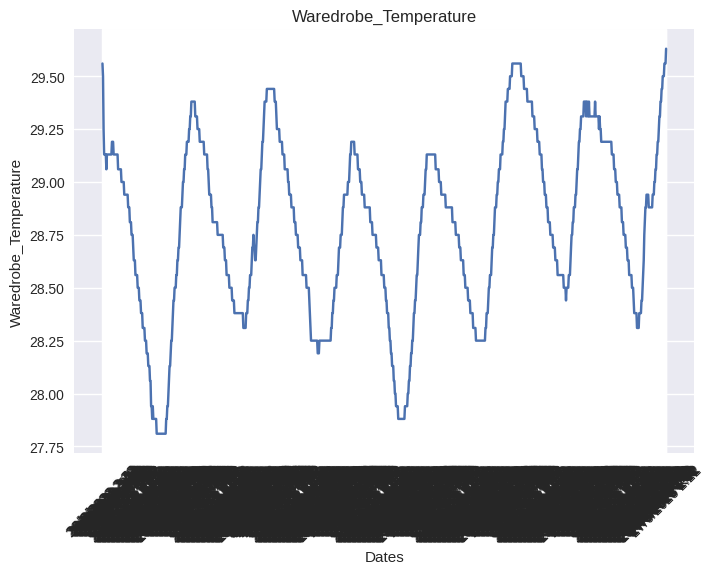

In [50]:
plt.style.use('seaborn')
plt.plot(df['Date'], df['Waredrobe_Temperature'])
plt.xlabel('Dates')
plt.ylabel('Waredrobe_Temperature')
plt.title('Waredrobe_Temperature')
plt.xticks(rotation = 45)
plt.show()

<ipython-input-51-8283930867ae>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


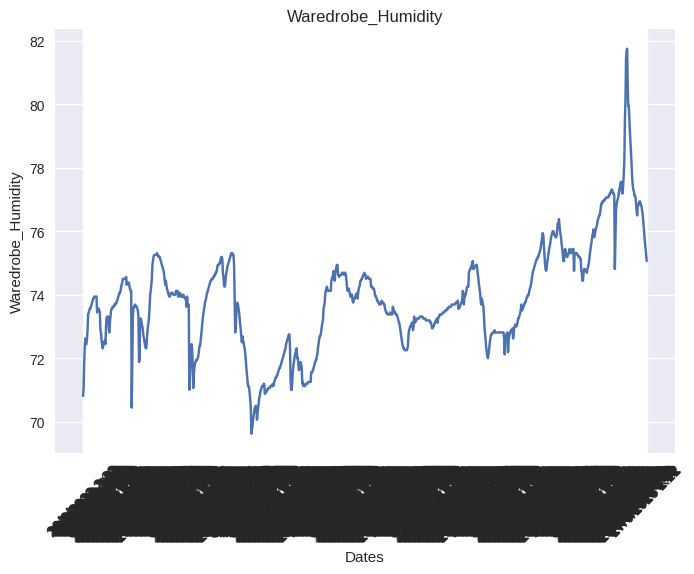

In [51]:
plt.style.use('seaborn')
plt.plot(df['Date'], df['Waredrobe_Humidity'])
plt.xlabel('Dates')
plt.ylabel('Waredrobe_Humidity')
plt.title('Waredrobe_Humidity')
plt.xticks(rotation = 45)
plt.show()

In [47]:
df.describe()

,Room_Temp,Room_Humidity,Waredrobe_Temperature,Waredrobe_Humidity
count,1009.000000,1009.000000,1009.000000,1009.000000
mean,29.202220,71.098375,28.787374,73.873380
std,0.674806,4.058086,0.428940,1.683218
min,27.250000,58.190000,27.810000,69.620000
25%,28.690000,68.690000,28.500000,72.810000
50%,29.190000,71.880000,28.810000,73.750000
75%,29.690000,74.250000,29.130000,74.750000
max,31.250000,78.810000,29.630000,81.750000


In [54]:
df['Room_Temp'].median()

29.19

In [53]:
df['Room_Humidity'].median()

71.88

In [55]:
df['Waredrobe_Temperature'].median()

28.81

In [56]:
df['Waredrobe_Humidity'].median()

73.75

For period of 7 days:
Humidity of Room vs Waredrobe (Waredrobe readings are 11% higher as compared to room.)

1. Max Room Humidity = 81.12
2. Max Waredrobe Humidity = 81.75
3. Min Room Humidity = 58.19
4. Min Waredrone Humidity = 69.62
5. Median Room Humdity = 71.88
6. Median Waredrobe Humdity = 73.75

Waredrobe has a lower temperature at estimated (5% based on the max room and waredrobe temperature comparison) as compared to the room
7. Max Room Temp = 31.25
8. Max Waredrobe Temp = 29.63
9. Min Room Temp = 27.25
10. Min Waredrobe Temp = 27.81
11. Median Room Temp = 29.19
12. Media Waredrobe Temp = 28.81



In [57]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-57-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Room_Temp,Room_Humidity,Waredrobe_Temperature,Waredrobe_Humidity
Room_Temp,1.000000,0.142844,-0.710388,-0.006366
Room_Humidity,0.142844,1.000000,-0.072258,-0.121180
Waredrobe_Temperature,-0.710388,-0.072258,1.000000,-0.025293
Waredrobe_Humidity,-0.006366,-0.121180,-0.025293,1.000000


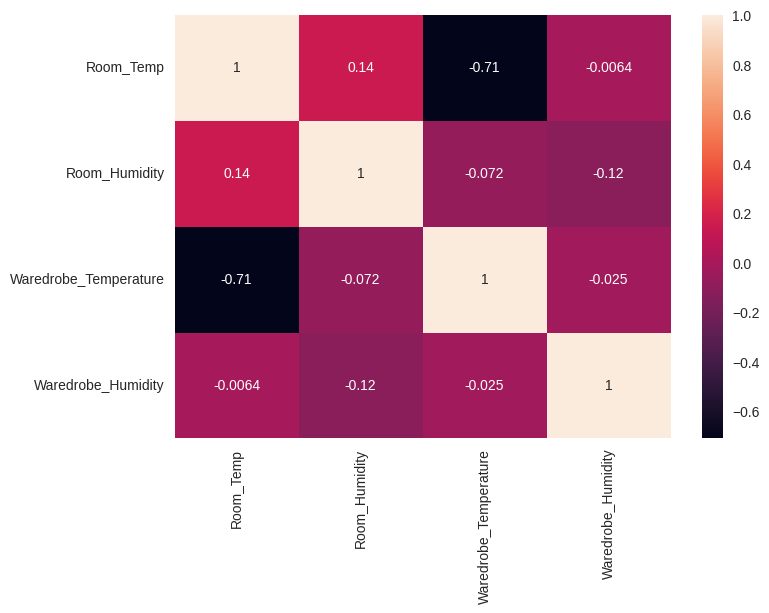

In [58]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, annot=True)
plt.show()

Room_Temp and Room_Humidity: There is a weak positive correlation (0.142844) between Room_Temp and Room_Humidity. This suggests that as the room temperature increases, there is a slight tendency for the room humidity to increase as well.

Room_Temp and Waredrobe_Temperature: There is a strong negative correlation (-0.710388) between Room_Temp and Waredrobe_Temperature. This indicates that as the room temperature increases, the temperature inside the wardrobe tends to decrease significantly.

Room_Temp and Waredrobe_Humidity: There is a very weak negative correlation (-0.006366) between Room_Temp and Waredrobe_Humidity. This suggests that there is almost no relationship between the room temperature and the humidity inside the wardrobe.

Room_Humidity and Waredrobe_Temperature: There is a weak negative correlation (-0.072258) between Room_Humidity and Waredrobe_Temperature. This implies that as the room humidity increases, there is a slight tendency for the temperature inside the wardrobe to decrease.

Room_Humidity and Waredrobe_Humidity: There is a weak negative correlation (-0.121180) between Room_Humidity and Waredrobe_Humidity. This suggests that as the room humidity increases, there is a slight tendency for the humidity inside the wardrobe to decrease.

Waredrobe_Temperature and Waredrobe_Humidity: There is almost no correlation (-0.025293) between Waredrobe_Temperature and Waredrobe_Humidity. This indicates that there is no significant relationship between the temperature and humidity inside the wardrobe.

In this case, the correlation coefficient between "Temp" and itself is 1. This indicates a perfect positive correlation, meaning that as the temperature increases, the temperature also increases in a linear fashion (which is expected since it's the same variable being compared to itself).

The correlation coefficient between "Temp" and "Humidity" is 0.028974, which is close to zero. This suggests a very weak or negligible linear relationship between temperature and humidity. The positive sign indicates a positive correlation, but the small magnitude of the correlation coefficient suggests that changes in temperature have little impact on humidity, and vice versa.

In summary, the correlation matrix suggests a strong positive correlation between temperature and itself (as expected) and a very weak positive correlation between temperature and humidity. However, it's important to note that correlation coefficients only capture linear relationships and may not capture other types of relationships between variables.





User
You are a data scientist. Explain this correlation matrix: How u evaluate this correlation matrix:
Temp 	Humidity
Temp 	1.000000 	0.028974
Humidity 	0.028974 	1.000000
ChatGPT
As a data scientist, I would evaluate this correlation matrix by analyzing the correlation coefficients and interpreting their implications for the relationship between the variables "Temp" and "Humidity."

In this case, we have a 2x2 correlation matrix where the correlation coefficient between "Temp" and itself is 1. This is expected because a variable will always have a perfect positive correlation with itself. This means that when "Temp" increases, it will always increase in a linear fashion, resulting in a correlation coefficient of 1.

The correlation coefficient between "Temp" and "Humidity" is 0.028974. This coefficient is close to zero, indicating a very weak linear relationship between these variables. The positive sign of the coefficient suggests a positive correlation, but the small magnitude of the coefficient implies that changes in temperature have little impact on humidity, and vice versa.

It's important to note that correlation coefficients only measure linear relationships between variables. Therefore, a correlation coefficient of zero does not necessarily mean there is no relationship between the variables; it just means there is no linear relationship. There could still be other types of relationships or interactions between the variables that are not captured by the correlation coefficient.

In summary, this correlation matrix suggests a strong positive correlation between temperature and itself (as expected), but a very weak positive correlation between temperature and humidity. This implies that changes in temperature have minimal impact on humidity in a linear sense. However, further analysis and exploration may be needed to understand any potential non-linear relationships or other factors that could be influencing the variables.


## Question 3: Data Visualisation

Create four different data panels from the original dataframe.
- First panel contains the records from January 2018 to December 2018
- Second panel contains the records from January 2019 to December 2019
- Third panel contains the records from January 2020 to December 2020
- Fourth panel contains the records from January 2021 to December 2021

In order to do so, create a column `panel` that contains the panel number for every datapoint
<div align="right"> (1 point) </div>

<ipython-input-37-cfe0c4db7885>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


NameError: ignored

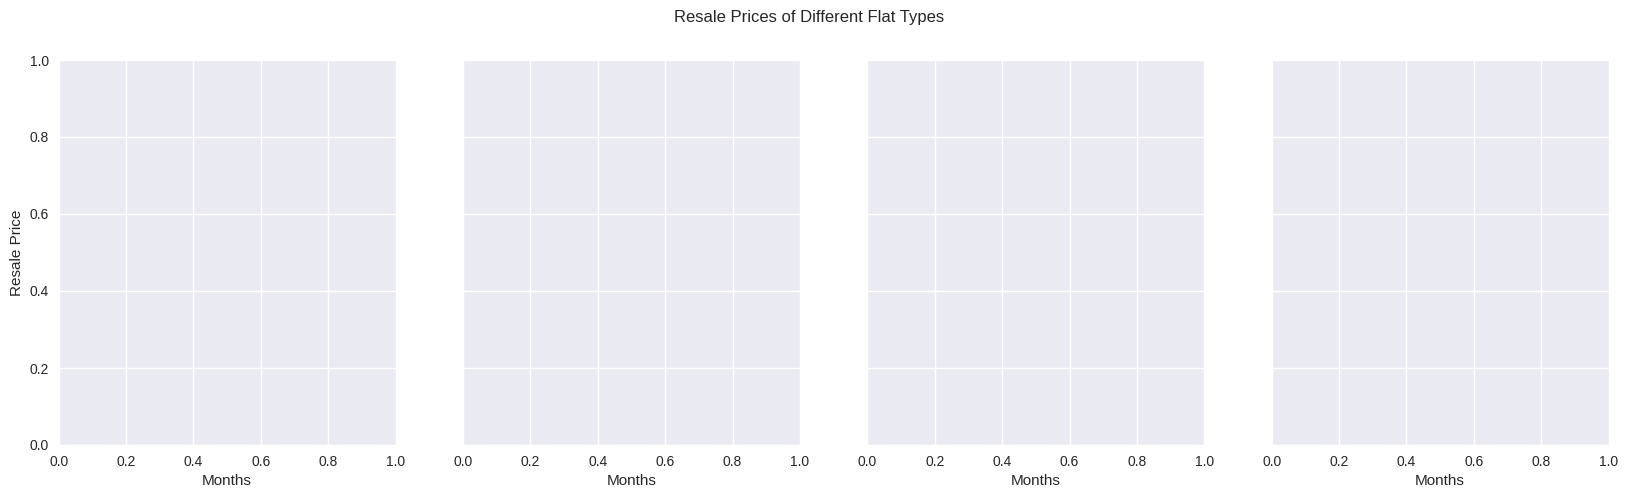

In [ ]:
plt.style.use('seaborn')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(20, 5))
fig.suptitle('Resale Prices of Different Flat Types')
ax1.set_ylabel('Resale Price')
ax1.set_xlabel('Months')
ax2.set_xlabel('Months')
ax3.set_xlabel('Months')
ax4.set_xlabel('Months')

#plot 1:
#Panel 1 - 2 rm
df_master_panel1 = df_master.loc[(df_master['panel'] == '1')] #defining a new df for panel 1
df_master_panel1_2rm = df_master_panel1.loc[(df_master_panel1['flat_type'] == '2 ROOM')]  #defining a panel 1 for 2 rm flat type
df_master_panel1_2rm_groupbyMonth = df_master_panel1_2rm.groupby('month', sort=False).mean()  #defining a mean of resale price of 2 rm flat based on month
ax1.plot(df_master_panel1_2rm_groupbyMonth.index, df_master_panel1_2rm_groupbyMonth['resale_price'].values) #plot 2 rm flat lineplot




# Question 3: Bootstrap and Confidence Intervals

In Week 2, we learnt the role of statistics connecting the observation on samples to their estimates on the population. Let's us create a simulation of the experiment and validate the central limit theorem.

We will treat `df` as the population and take *bootstrap samples* (of size 100 datapoints each) from it. Please write code that does the following.
- Generates 1000 bootstrap samples.
- Compute sample mean for `price_per_sqm` for every sample.
- Plot a histogram of mean (does it not look like a normal distribution!)

<div align="right"> (3 points) </div>

<AxesSubplot:ylabel='Count'>

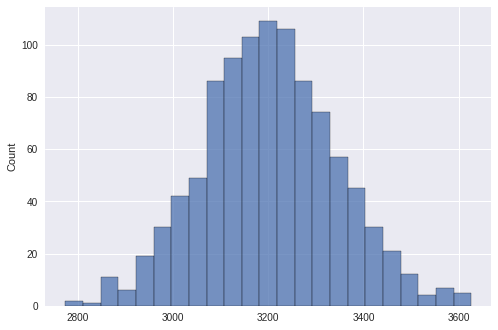

In [ ]:
listPricePerSqm = df_master['price_per_sqm'] #define price_per_sqm into a list
sampleMeanPps = [] #empty list to store the


for i in range(1000):
  randomSample = df_master.sample(n=100, replace=False)
  randomSampleMean = np.mean(randomSample['price_per_sqm'])
  sampleMeanPps.append(randomSampleMean)


sns.histplot(data=sampleMeanPps)
#plt.hist(sampleMeanPps)
#plt.show()

Generate 95% confidence interval for the (population) mean of `price_per_sqm` using the bootstrap samples.
<div align="right"> (2 points) </div>

In [ ]:
confidence = 0.95
confidenceInterval=np.percentile(sampleMeanPps, [100*(1-confidence)/2, 100*(1-(1-confidence)/2)])
confidenceInterval

array([2930.19946  , 3482.4146775])

Does the population mean lie inside it?

<div align="right">(1 point)</div>

In [ ]:
listPricePerSqmMean = df_master['price_per_sqm'].mean()

print(f"The population mean is : {listPricePerSqmMean}")
print(f"Yes, it lies inside the 95% confidence interval between : {confidenceInterval}")

The population mean is : 3204.4326167377467
Yes, it lies inside the 95% confidence interval between : [2930.19946   3482.4146775]


## Question 4: Growing Resale Prices!

In 2019, the rental cost of a 3BR HDB in Clementi used to be around 2500 dollars, and now it has reached as high as 4100. dollars. Some analysis shows that it is caused due to COVID. Well, we are not sure about that yet!

Is it true about the resale prices as well? Is there some correlation? Let's analyse the growth of various areas in Singapore.

- Compute the *median* `price_per_sqm` of houses in various areas in 2019 and 2022.
- We define *growth* as the normalised difference between the median housing `price_per_sqm` in 2019 and 2022, i.e. *(price_per_sqm_2022 - price_per_sqm_2019) / price_per_sqm_2019*. Compute `growth` of various areas in Singapore.
- Create a dataframe that contains four columns: `town`, `2019_median`, `2022_median` and `growth`. Print the dataframe sorted in descending order of the growth.



<div align="right"> (3 points) </div>

In [ ]:
#filter df based on 2019 and 2022
df_2019 = df_master.loc[(df_master['month'].str[:4] == '2019')]
df_2022 = df_master.loc[(df_master['month'].str[:4] == '2022')]


# Median price for 2019
median2019 = df_2019.groupby('town', sort=False).median() # median for 2019
median2019Pps = median2019['price_per_sqm']
#median2019Pps

#Median price for 2022
median2022 = df_2022.groupby('town', sort=False).median() # median for 2022
median2022Pps = median2022['price_per_sqm']
#median2022Pps

#Combine median price for 2019 and 2022
newDF = pd.merge(median2019Pps.reset_index(), median2022Pps.reset_index(), suffixes=('_2019_median', '_2022_median'), on="town", how='inner')

#Add new feature of growth and calculate growth rate
newDF['growth'] = (newDF['price_per_sqm_2022_median'] - newDF['price_per_sqm_2019_median']) / newDF['price_per_sqm_2019_median']

#Sort growth rate in descending order
finalDf = newDF.sort_values(by='growth', ascending=False)
finalDf

,town,price_per_sqm_2019_median,price_per_sqm_2022_median,growth
8,CHOA CHU KANG,3367.930,4888.890,0.451601
19,SEMBAWANG,3664.120,5284.050,0.442106
24,WOODLANDS,3445.800,4779.410,0.387025
3,BUKIT BATOK,3750.000,5130.155,0.368041
25,YISHUN,3838.125,5140.190,0.339245
14,KALLANG/WHAMPOA,5283.880,7000.000,0.324784
13,JURONG WEST,3719.010,4864.860,0.308106
0,ANG MO KIO,4117.650,5328.910,0.294163
11,HOUGANG,4047.620,5238.100,0.294119
23,TOA PAYOH,4444.440,5692.310,0.280771


Do some research to qualitatively reason why COVID might have caused this surge in resale prices. Please provide two reasons for the same.
<div align="right"> (2 point) </div>



1. Due to the Singapore's COVID cuircuit breaker locked down on 3 April 2020, there was disruption of construction supplies and workers which delayed the building of new flats such as Build-To-order (BTO) flats. This resulted in people who needed to purchase flat to acquire resale flats as the waiting time is significantly lesser than waiting for the construction of new flats. Naturally, the shortage of supplies (new flats) and high demand of resale flats has lead to the increase resale price.


2. Due to the new norm of remote working and learning, the general population are seeking for larger living spaces to accommodate work-from-home and learning at home arrangements. The increased demand for larger homes has driven up resale prices and evidently shown in the growth rate of resale properties located at the outskirt of Singapore (eg Choa Chu Kang, Sembawang, Woodlands, etc) which is cheaper (shown in the above dataframe) and bigger in size.